In [316]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd
#from functools import reduce

pd.set_option('display.max_columns', 200)
pd.set_option('display.max_rows', 500)

In [317]:
pkls_path = pkls = r'D:\Tesis\ResEleCon-MX\pickles'
concentrador = pd.read_pickle(pkls_path + '/total_energy.pkl')

In [318]:
concentrador.head()

,folioviv,foliohog,CVE_MUN,estado,publico,CVE_ZM,NOM_ZM,CVE_ENT,NOM_ENT,NOM_MUN,tam_loc,est_socio,est_dis,upm,factor,clase_hog,sexo_jefe,edad_jefe,educa_jefe,tot_integ,hombres,mujeres,mayores,menores,ocupados,ing_cor,gasto_mon,energia,vehiculos,tipo_viv,antiguedad,num_cuarto,disp_elect,focos_inca,focos_ahor,combustible,tenencia,calent_sol,calent_gas,tanque_gas,aire_acond,calefacc,gasto_tri_ele,gasto_tri_gas,gasto_tri_lpg,gasto_tri_oil,gasto_tri_diesel,gasto_tri_coal,gasto_tri_wood,gasto_tri_heat,gasto_tri_Magna,gasto_tri_Premium,gasto_tri_Die-Gas,gasto_tri_total_gas,gasto_tri_total_gasolina,Tarifa,Region,lpg_kwh,g_natural_kwh,magna_kwh,premium_kwh,diesel_kwh,kwh,fuel,gas,total_ener
0,100013601,1,1001,1,0.00,1.01,Aguascalientes,1,Aguascalientes,Aguascalientes,1,3,2,1,175,2,1,74,4,3,2,1,3,0,2,76403.70,18551.47,3600.0,1,1.0,42.0,6,1,0.0,6.0,4.0,4,1,1,2,2,2,600.0,3000.0,NaN,NaN,NaN,NaN,NaN,NaN,7200.0,NaN,NaN,3000.0,7200.0,1,SP,NaN,1578.284091,1180.332920,NaN,NaN,158.129476,1180.332920,1578.284091,2916.746487
1,100013602,1,1001,1,578.56,1.01,Aguascalientes,1,Aguascalientes,Aguascalientes,1,3,2,1,175,2,1,48,11,5,2,3,5,0,2,42987.73,55470.99,495.0,2,1.0,40.0,6,1,0.0,12.0,4.0,2,2,1,2,2,2,450.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3600.0,NaN,NaN,NaN,3600.0,1,SP,NaN,NaN,590.166460,NaN,NaN,142.746376,590.166460,NaN,732.912836
2,100013603,1,1001,1,4255.68,1.01,Aguascalientes,1,Aguascalientes,Aguascalientes,1,3,2,1,175,2,1,39,10,2,1,1,2,0,2,580697.74,103106.89,2475.0,1,1.0,50.0,7,1,0.0,12.0,3.0,4,2,1,1,2,2,375.0,NaN,2100.0,NaN,NaN,NaN,NaN,NaN,NaN,4500.0,NaN,2100.0,4500.0,1,SP,519.516441,NaN,NaN,684.051278,NaN,125.505879,684.051278,519.516441,1329.073599
3,100013604,1,1001,1,0.00,1.01,Aguascalientes,1,Aguascalientes,Aguascalientes,1,3,2,1,175,2,2,70,8,2,1,1,2,0,0,46252.71,19340.06,858.0,1,1.0,45.0,5,1,0.0,7.0,4.0,4,1,1,2,2,2,480.0,378.0,NaN,NaN,NaN,NaN,NaN,NaN,6000.0,NaN,NaN,378.0,6000.0,1,SP,NaN,198.863795,983.610767,NaN,NaN,145.822996,983.610767,198.863795,1328.297558
4,100013606,1,1001,1,0.00,1.01,Aguascalientes,1,Aguascalientes,Aguascalientes,1,3,2,1,175,2,2,51,4,4,1,3,3,1,2,53837.09,13605.03,300.0,0,1.0,40.0,4,1,0.0,7.0,4.0,2,2,1,2,2,2,300.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,1,SP,NaN,NaN,NaN,NaN,NaN,102.962235,NaN,NaN,102.962235


In [319]:
col = ['CVE_ZM','NOM_ZM','folioviv','foliohog','CVE_MUN','upm','est_socio','sexo_jefe','edad_jefe','educa_jefe','tot_integ','ing_cor',
       'num_cuarto','tenencia','gasto_tri_ele','gasto_tri_gas','gasto_tri_lpg','gasto_tri_total_gas','lpg_kwh',
       'g_natural_kwh','kwh','gas']
ener = concentrador[col].copy()

# Adding variables

In [320]:
ener['Total'] = ener[['gas','kwh']].sum(axis=1, min_count=1)

# Table 1

### Size original

In [321]:
len(ener)

31100

In [322]:
print('Electricity data complete: ',len(ener.dropna(subset=['kwh'])))
print('Gas data complete: ',len(ener.dropna(subset=['gas'])))

Electricity data complete:  28239
Gas data complete:  20102


### Size gas and electricity complete

In [323]:
ener.dropna(subset=['kwh','gas'], inplace=True)
print('Complete samples (gas and electricity): ',len(ener))

Complete samples (gas and electricity):  18588


In [324]:
ener.isnull().sum(axis = 0)

CVE_ZM                     0
NOM_ZM                     0
folioviv                   0
foliohog                   0
CVE_MUN                    0
upm                        0
est_socio                  0
sexo_jefe                  0
edad_jefe                  0
educa_jefe                 0
tot_integ                  0
ing_cor                    0
num_cuarto                 0
tenencia                   0
gasto_tri_ele              0
gasto_tri_gas          15048
gasto_tri_lpg           3390
gasto_tri_total_gas        0
lpg_kwh                 3390
g_natural_kwh          15048
kwh                        0
gas                        0
Total                      0
dtype: int64

In [325]:
ener.to_pickle(pkls_path + '/energy_final.pkl')

# Figure 1
## Maps

In [326]:
file = r'D:\Tesis\Datos\shapefiles\ZM\ZM_built-up.shp'

metro_map = gpd.read_file(file)
metro_map["geometry"] = metro_map.centroid
metro_map = metro_map[metro_map.CVE_ZM.isin(ener['CVE_ZM'])]

metro_map.to_file("shapes/ZM_points.shp") 

# Table 2 

In [327]:
concentrador['completeness'] = concentrador[['kwh','gas']].sum(axis=1, min_count=2)

In [328]:
table2 = concentrador.groupby(['CVE_ZM','NOM_ZM','CVE_ENT','NOM_ENT']).agg('count')[['completeness']]
table2.to_clipboard()
table2.head()

,,,,completeness
CVE_ZM,NOM_ZM,CVE_ENT,NOM_ENT,
1.01,Aguascalientes,1,Aguascalientes,691
2.01,Ensenada,2,Baja California,154
2.02,Mexicali,2,Baja California,296
2.03,Tijuana,2,Baja California,686
3.01,La Paz,3,Baja California Sur,193


# Figure 2
Absolute energy consumption

In [329]:
ener.describe()

,CVE_ZM,folioviv,foliohog,CVE_MUN,upm,est_socio,sexo_jefe,edad_jefe,educa_jefe,tot_integ,ing_cor,num_cuarto,tenencia,gasto_tri_ele,gasto_tri_gas,gasto_tri_lpg,gasto_tri_total_gas,lpg_kwh,g_natural_kwh,kwh,gas,Total
count,18588.000000,1.858800e+04,18588.000000,18588.000000,18588.000000,18588.000000,18588.000000,18588.000000,18588.000000,18588.000000,1.858800e+04,18588.000000,18588.000000,18588.000000,3540.000000,15198.000000,18588.000000,15198.000000,3540.000000,18588.000000,18588.000000,18588.000000
mean,14.524109,1.506066e+09,1.011836,15050.821498,4016.452711,2.635894,1.296589,50.448892,6.439262,3.730148,6.193809e+04,4.155961,3.139176,878.416634,931.766308,1269.236971,1215.209609,288.533607,490.197313,218.830439,329.267928,548.098367
std,9.117559,9.101782e+08,0.125209,9116.238729,2369.045261,0.747505,0.456766,15.135546,2.511441,1.770170,7.485359e+04,1.544151,1.193789,1229.663322,733.228446,844.734432,842.053693,200.097819,385.747597,191.744534,261.915031,341.915754
min,1.010000,1.000136e+08,1.000000,1001.000000,1.000000,1.000000,1.000000,17.000000,1.000000,1.000000,0.000000e+00,1.000000,1.000000,12.500000,25.000000,104.510000,25.000000,24.660240,13.152367,4.529576,13.152367,43.120356
25%,7.020000,8.024002e+08,1.000000,8019.000000,2161.000000,2.000000,1.000000,39.000000,4.000000,2.000000,2.987365e+04,3.000000,2.000000,315.000000,540.000000,638.700000,600.000000,143.643822,284.091136,111.979693,166.623241,339.984085
50%,13.010000,1.503741e+09,1.000000,15025.000000,4009.000000,3.000000,1.000000,49.000000,6.000000,4.000000,4.635856e+04,4.000000,4.000000,525.000000,795.000000,1161.290000,1103.220000,257.997205,418.245284,158.129476,266.597186,470.225476
75%,22.010000,2.202712e+09,1.000000,22014.000000,5825.000000,3.000000,2.000000,61.000000,8.000000,5.000000,7.349293e+04,5.000000,4.000000,960.000000,1200.000000,1683.870000,1596.770000,377.319441,631.313636,250.428081,399.895779,651.950157
max,32.010000,3.202440e+09,5.000000,32056.000000,8351.000000,4.000000,2.000000,101.000000,11.000000,22.000000,4.033086e+06,22.000000,6.000000,30750.000000,18000.000000,22499.990000,22949.990000,4998.695017,9469.704545,2852.223935,9469.704545,9797.048130


In [330]:
ener_ordered = ener.sort_values(by=['Total'], ignore_index=True)
ener_ordered_cut = ener_ordered[0:18587]

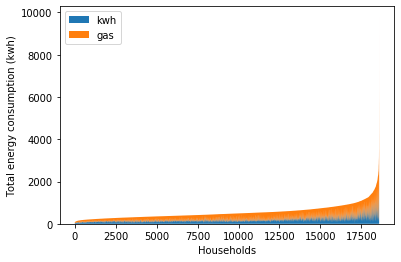

In [331]:
# Data
x=ener_ordered.index
y=[ener_ordered.kwh.to_list(),ener_ordered.gas.to_list()]

# Plot
fig, ax = plt.subplots()
ax.stackplot(x,y, labels=['kwh','gas'])
plt.legend(loc='upper left')

ax.set_xlabel('Households')
ax.set_ylabel('Total energy consumption (kwh)')

#plt.savefig('images/graphs/cumulative.eps', format='eps', bbox_inches='tight')
plt.show()

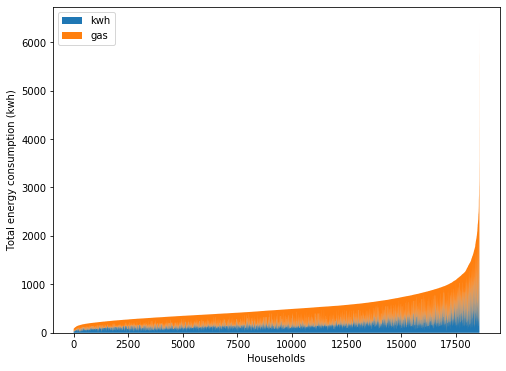

In [332]:
# Data
x=ener_ordered_cut.index
y=[ener_ordered_cut.kwh.to_list(),ener_ordered_cut.gas.to_list()]

# Plot
fig, ax = plt.subplots(figsize=(8,6))
ax.stackplot(x,y, labels=['kwh','gas'])
plt.legend(loc='upper left')

ax.set_xlabel('Households')
ax.set_ylabel('Total energy consumption (kwh)')

plt.show()

# Figure 3
Gas vs electricity

# Nota
Esta ya esta como logaritmo pero se ve raro

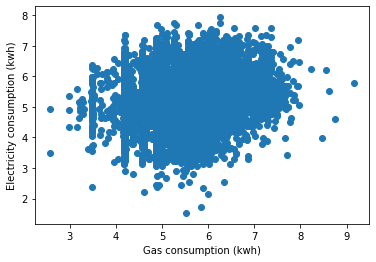

In [333]:
fig, ax = plt.subplots()
ax.scatter(np.log(ener['gas']), np.log(ener['kwh']))
    
ax.set_ylabel('Electricity consumption (kwh)')
ax.set_xlabel('Gas consumption (kwh)')

#plt.savefig('images/graphs/fig3.eps', format='eps', bbox_inches='tight')

plt.show()

# Figure 4
Consumption per urban area

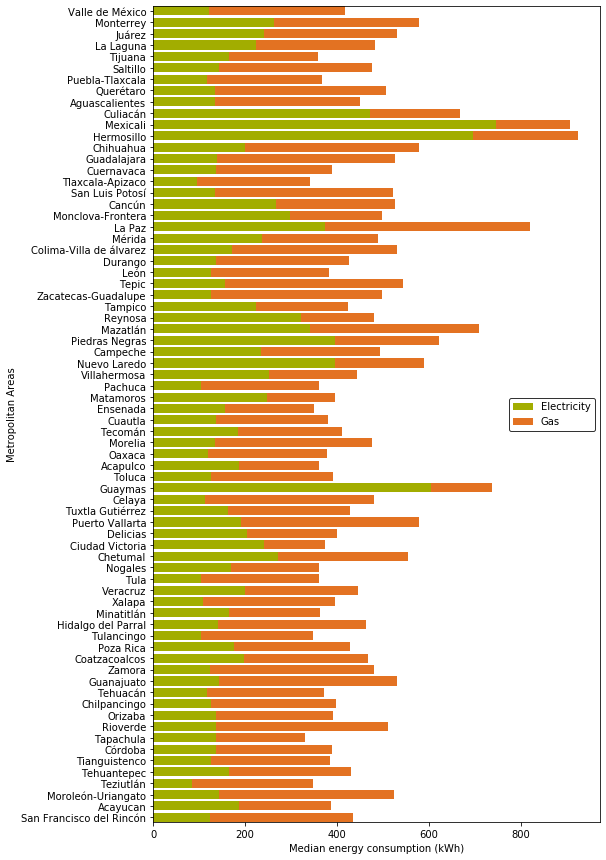

In [334]:
metro_ener = ener.groupby(['CVE_ZM','NOM_ZM'], as_index=False).agg({'kwh':'median', 'gas':'median','Total':'sum'})

metro_ener_sort = metro_ener.sort_values(by=['Total'])

fig = plt.figure(figsize=(8,15))
ax1 = fig.add_subplot(1, 1, 1)
p1 = ax1.barh(metro_ener_sort.NOM_ZM, metro_ener_sort.kwh, color="#A2AD00")  
p2 = ax1.barh(metro_ener_sort.NOM_ZM, metro_ener_sort.gas, left=metro_ener_sort.kwh, color="#E37222")

#ax2 = ax1.twiny()

#ax2.scatter(metro_ener_sort.Total.values/1000, y=metro_ener_sort.NOM_ZM, color='b', s=40)

# we also need to switch the labels
ax1.set_xlabel('Median energy consumption (kWh)')
ax1.set_ylabel('Metropolitan Areas')
#ax2.set_xlabel('Total energy consumption (MWh)')

plt.legend((p1[0], p2[0]), ('Electricity', 'Gas'), loc=7, frameon=True, edgecolor='black')
plt.margins(y=0) #0.005
#ax2.margins(x=0.01) #0.005

#plt.savefig('images/graphs/consumption_zm.eps', format='eps', bbox_inches='tight')
plt.show() 

# Figure 5
Consumption by decile

# Nota

comenta la segunda linea y descomenta la primera para quitar consumos menores a 50

In [335]:
#ener_outliers_out = ener[ener.Total>50].copy()
ener_outliers_out = ener.copy()

In [336]:
Q1 = ener_outliers_out['Total'].quantile(0.25)
Q3 = ener_outliers_out['Total'].quantile(0.75)
IQR = Q3 - Q1

ener_outliers_out = ener_outliers_out[~((ener_outliers_out.Total < (Q1 - 1.5 * IQR)) |
                                        (ener_outliers_out.Total > (Q3 + 1.5 * IQR)))]

In [337]:
ener_outliers_out['income_decile'] = pd.qcut(ener_outliers_out['ing_cor'], 10, labels=False)
ener['income_decile'] = pd.qcut(ener['ing_cor'], 10, labels=False)

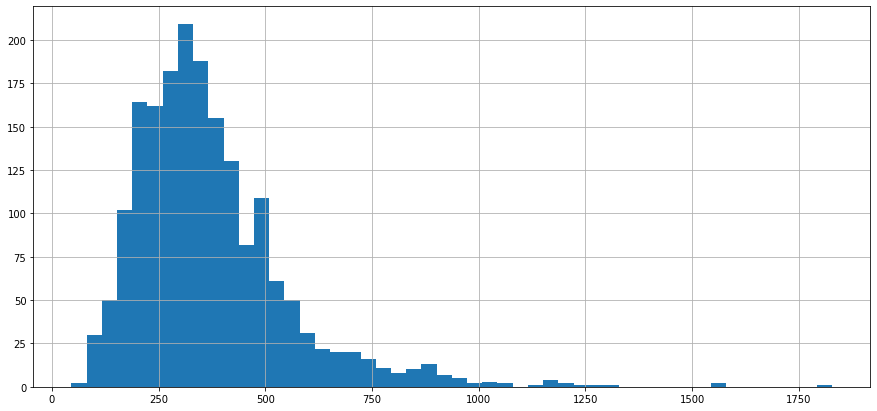

In [338]:
ener.loc[ener['income_decile']==0, 'Total'].hist(bins = 50, figsize=(15,7))

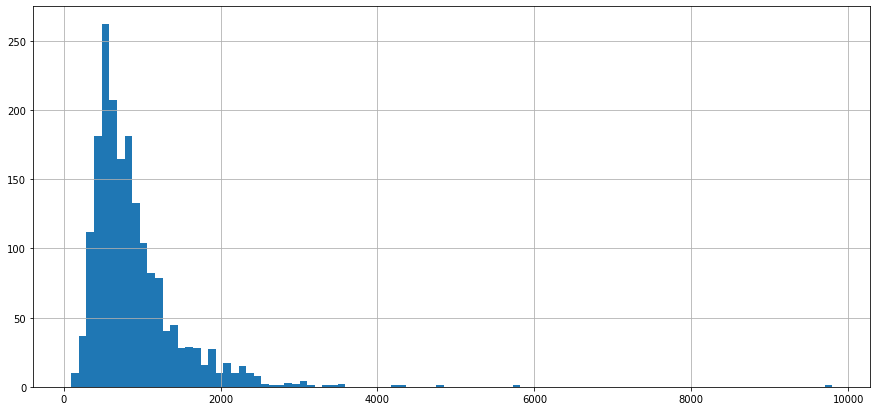

In [339]:
ener.loc[ener['income_decile']==9, 'Total'].hist(bins = 100, figsize=(15,7))

# Nota
Aqui ya quite los outliers, pero las lineas siguen llegando al tope, si quito los datos con consumo menor a 50 llegan aun mas abajo.

Text(0.5, 0.98, '')

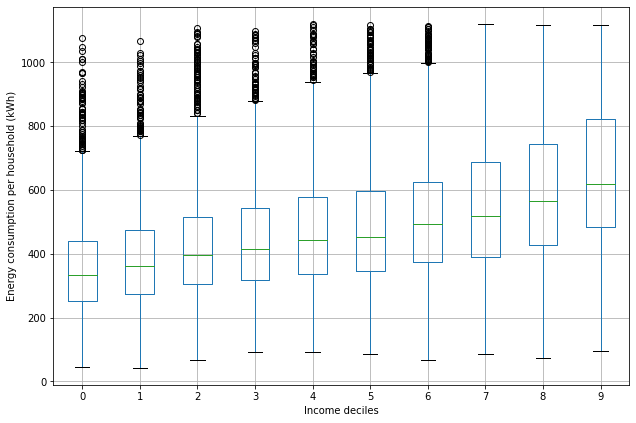

In [340]:
# Two subplots, the axes array is 1-d
fig = plt.figure(figsize=(10,7))
ax = fig.add_subplot(1, 1, 1)

ener_outliers_out.boxplot(column=['Total'], by=['income_decile'],  ax=ax)
ax.set_xlabel('Income deciles')
ax.set_ylabel('Energy consumption per household (kWh)')

plt.title('')
plt.suptitle('')

#plt.savefig('images/graphs/income_consumption_bp.eps', format='eps', bbox_inches='tight')

# Figure 6
Consumption per socioeconomic level

Text(0.5, 0.98, '')

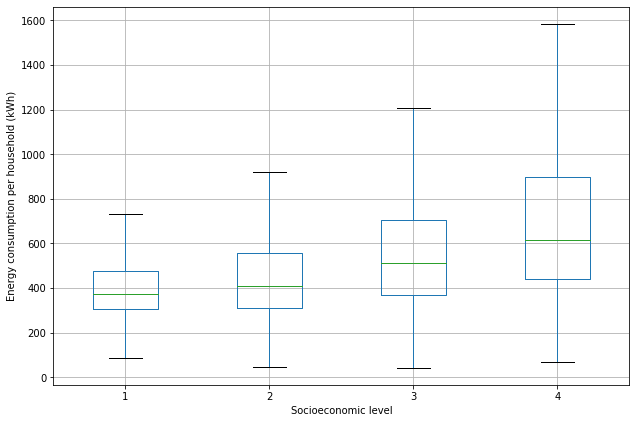

In [341]:
# Two subplots, the axes array is 1-d
fig = plt.figure(figsize=(10,7))
ax = fig.add_subplot(1, 1, 1)

ener.boxplot(column=['Total'], by=['est_socio'], showfliers=False, ax=ax)
ax.set_xlabel('Socioeconomic level')
ax.set_ylabel('Energy consumption per household (kWh)')

plt.title('')
plt.suptitle('')

#plt.savefig('images/graphs/estrato_consumption_bp.eps', format='eps', bbox_inches='tight')

# Figure 7
Socioeconomic variables and consumption

In [342]:
ener['overcrowding'] = (ener['tot_integ']/ener['num_cuarto']).round(0)

In [343]:
tenencia_dict = {1:'rental',2:'loaned',3:"own/paying",4:'own/paid',5:'intestate',6:'other'}
ener['ownership'] = ener['tenencia'].map(tenencia_dict)

sexo_jefe_dict = {1:'Male', 2:'Female'}
ener['gender_head'] = ener['sexo_jefe'].map(sexo_jefe_dict)

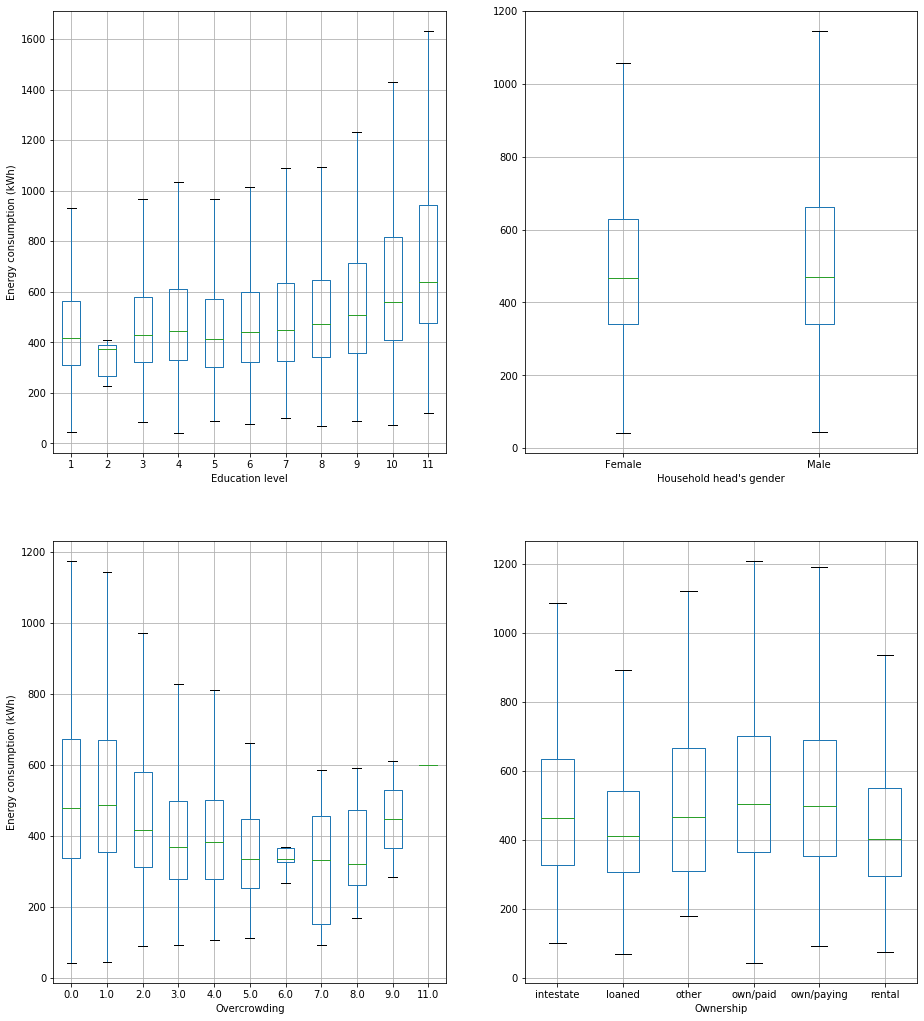

In [344]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15,18))

ener.boxplot(column=['Total'], by=['educa_jefe'], showfliers=False, ax=axes[0,0])
ener.boxplot(column=['Total'], by=['gender_head'], showfliers=False,  ax=axes[0,1])
ener.boxplot(column=['Total'], by=['overcrowding'], showfliers=False,  ax=axes[1,0])
ener.boxplot(column=['Total'], by=['ownership'], showfliers=False,  ax=axes[1,1])

axes[0,0].set(xlabel = 'Education level', ylabel = 'Energy consumption (kWh)', title = '') 
axes[0,1].set(xlabel = "Household head's gender", title = '') 
axes[1,0].set(xlabel = "Overcrowding", ylabel = 'Energy consumption (kWh)', title = '') 
axes[1,1].set(xlabel = "Ownership", title = '') 

plt.title('')
plt.suptitle('')

plt.savefig('images/graphs/socioeco_consumption.eps', format='eps', bbox_inches='tight')

# Figure 8
Energy and temperature

In [345]:
temp_season = pd.read_pickle(pkls_path + '/temp_season_mun.pkl')
ener = ener.merge(temp_season[['CVE_MUN', 'Summer']], on='CVE_MUN', how='left')

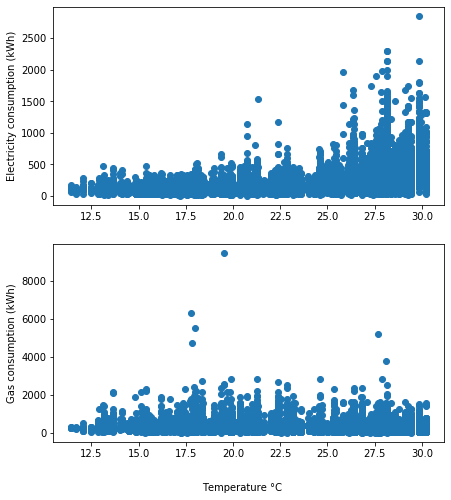

In [350]:
fig, axes = plt.subplots(nrows=2, figsize=(7,8))

axes[0].scatter((ener['Summer']), (ener['kwh']))
axes[1].scatter((ener['Summer']), (ener['gas']))    

axes[0].set(ylabel = 'Electricity consumption (kWh)') 
axes[1].set(ylabel = 'Gas consumption (kWh)') 

fig.text(0.5, 0.04, 'Temperature °C', ha='center')

#plt.savefig('images/graphs/temp_kwh.eps', format='eps', bbox_inches='tight')

plt.show()

# Figure 9
Share per income decile

In [182]:
ener_share = ener.groupby('income_decile').agg({'kwh':'sum','gas':'sum'})
ener_share['total'] = ener_share['kwh'] + ener_share['gas']
ener_share['kwh'] = ener_share['kwh']/ener_share['total']*100
ener_share['gas'] = ener_share['gas']/ener_share['total']*100

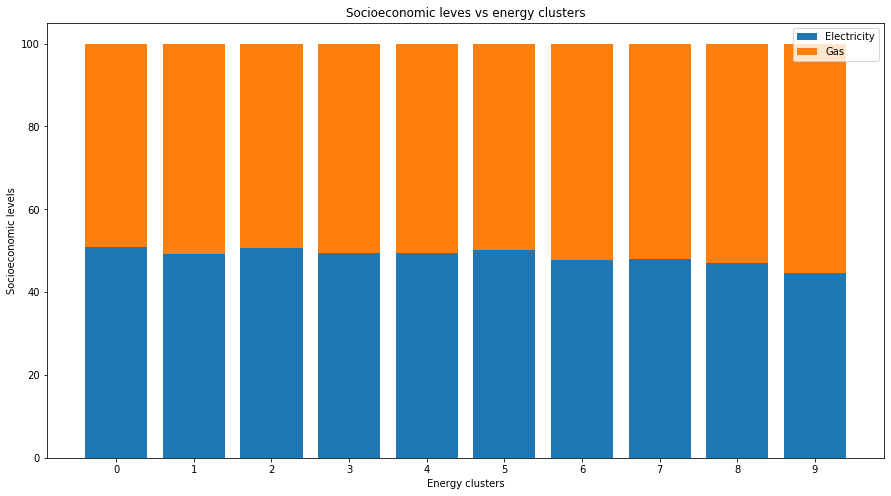

In [185]:
fig, ax = plt.subplots(figsize=(15,8))

ax.bar(ener_share.index.values.astype(str), ener_share['kwh'].values, label='Electricity')
ax.bar(ener_share.index.values.astype(str), ener_share['gas'].values, bottom=ener_share['kwh'].values, label='Gas')


ax.set_ylabel('Socioeconomic levels')
ax.set_xlabel('Energy clusters')
ax.set_title('Socioeconomic leves vs energy clusters')   
ax.legend()

plt.show()